# Tutorial 2 - matplotlib

matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [2]:
# Import for matlplotlib
import matplotlib

In a Jupyter notebook we want to ouput the graphs to the current notebook and so we need to run the `%matplotlib` inline magic command 

In [3]:
%matplotlib inline

Pyplot is a matplotlib module which provides a MATLAB-like interface.

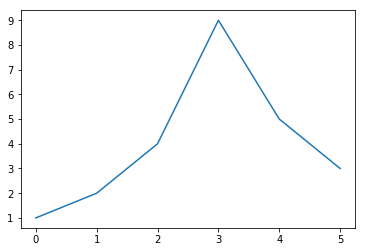

In [32]:
import matplotlib.pyplot as plt
plt.plot([1,2,4,9,5,3]) # This will be coordinates on vertical axis by default
plt.show()

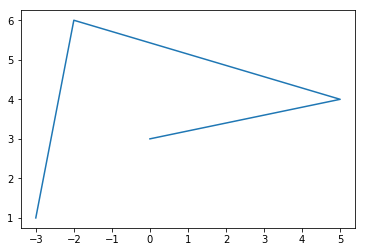

In [5]:
plt.plot([-3,-2,5,0],[1,6,4,3]) # we can also give coordinates for x and y
plt.show()

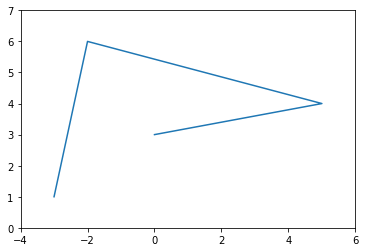

In [6]:
plt.plot([-3,-2,5,0],[1,6,4,3]) # we can also give coordinates for x and y
plt.axis([-4, 6, 0, 7]) # extent of each axis [xmin, xmax, ymin, ymax]
plt.show()

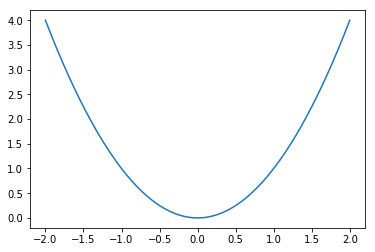

In [7]:
import numpy as np
x = np.linspace(-2,2,500)
y = x**2

plt.plot(x,y)
plt.show()

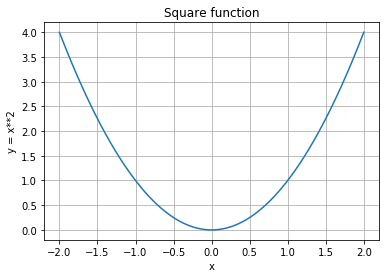

In [8]:
plt.plot(x,y)
plt.title('Square function')
plt.xlabel('x')
plt.ylabel('y = x**2')
plt.grid(True)
plt.show()

# Line Style and color
matplotlib will draw a line between consecutive points. 

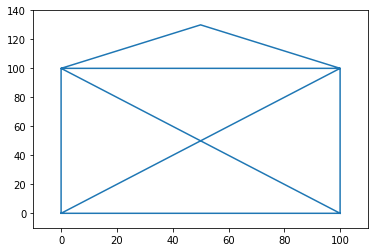

In [12]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

You can pass a 3rd argument to change the line's style and color. For example `"g--"` green dashed line. 

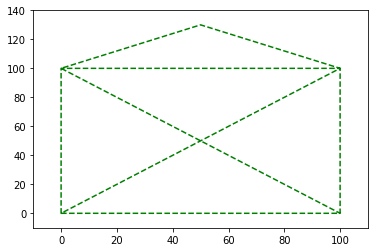

In [14]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()


Can also plot multiple lines on one graph: `x1, y1, [style1], x2, y2, [style2], ...`

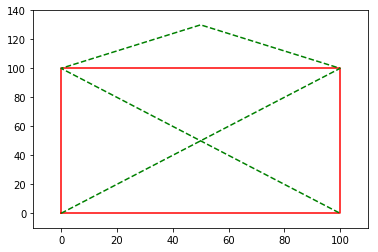

In [19]:
plt.plot([0,100,100,0,0],[0,0,100,100,0], 'r-', [0,100,50,0,100], [0,100,130,100,0], 'g--')
plt.axis([-10, 110, -10, 140])
plt.show()

You can also draw simple points instead of lines. Here's an example. 

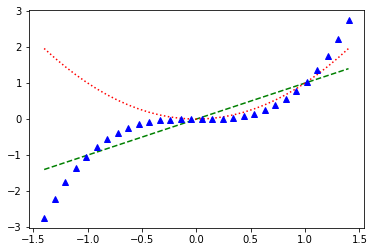

In [20]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

The plot function returns a list of Line2D objects (one for each line). You can set extra attributes on these lines such as the width, the dash style, or alpha level. 

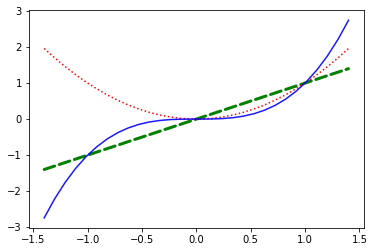

In [24]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3, = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b')
line1.set_linewidth(3.0)
line1.set_dash_capstyle('round')
line3.set_alpha(0.9)
plt.show()

Saving a figure is a simple as calling `savefig` with each name of the file (or a file object). The available image formats depend on the graphics backend you use. 

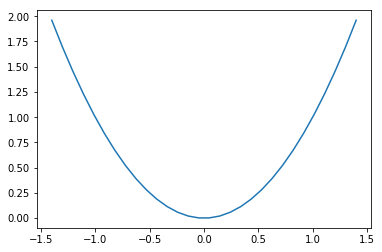

In [25]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent = True)

# Subplots
To create a subplot just call the `subplot` function and specify the number of rows and columns in the figure and the index of the figure you want. Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()` ), so when you call the plot function it draws on the active subplot. 

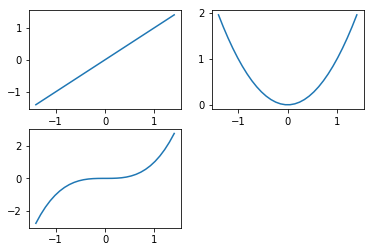

In [29]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2,2,1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2,2,2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2,2,3) # 2 rows, 2 columns, 3rd subplot = bottom left
plt.plot(x, x**3)
plt.show()


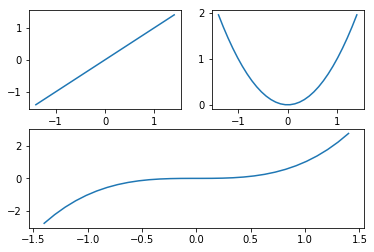

In [31]:
plt.subplot(2,2,1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2,2,2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2,1,2) # 2 rows, *1* column, 2nd subplot = bottom 
plt.plot(x, x**3)
plt.show()

# Multiple figures
It's possible to draw multiple figures. Each figure may contain one or more subplots. By default matplotlib will create `figure(1)` automatically. When you switch figures, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()` ) and the active subplot of that figure becomes the current subplot. 

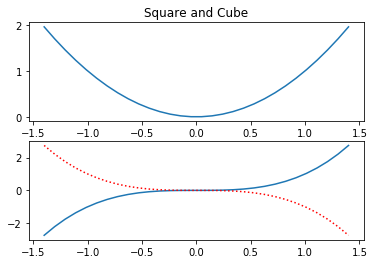

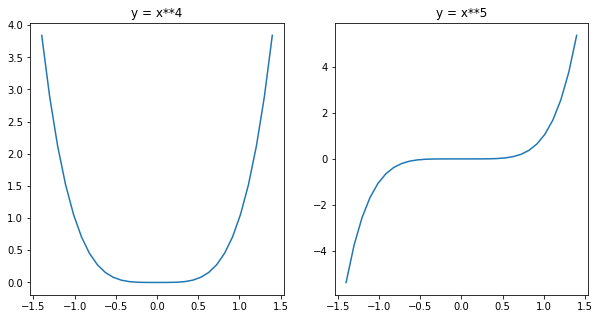

In [35]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10,5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title('y = x**4')
plt.subplot(122)
plt.plot(x, x**5)
plt.title('y = x**5')

plt.figure(1) #back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, 'r:')

plt.show()


PyPlots state machine (implicit vs explicit): The state machine keeps track every time you call the plot function, pyplot just draws on the currently active subplot. It also automatically creates a figure and subplot when you call plot. This magic is an attractive feature for a inteactive environment. 

When you are writing a program, explicit is better than implicit. Explicit
code is easier to debug and maintain. 

PyPlot allows you to ignor the state machine so you can write explicit code. Call the subplots function and use the figure object and list of axes that are returns. No more magic! 

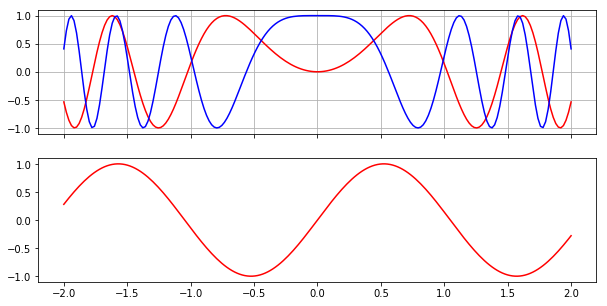

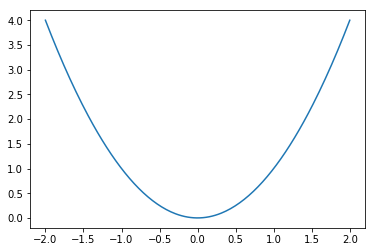

In [40]:
x = np.linspace(-2,2,200)
fig1, (ax_top, ax_bottom) = plt.subplots(2,1,sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), 'r-', x, np.cos(5*x**2), 'b-')
line3, = ax_bottom.plot(x, np.sin(3*x), 'r-')
ax_top.grid(True)

fig2, ax = plt.subplots(1,1)
ax.plot(x, x**2)
plt.show()

It is recommended to use the object oriented interface in our programs. 

# Legends 
The simplest way to add a legend is to set a lable on all lines, then just call the legend function. 

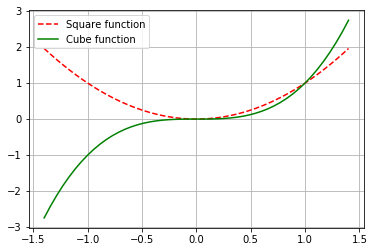

In [42]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, 'r--', label = 'Square function')
plt.plot(x, x**3, 'g-', label = 'Cube function')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Non-linear scales

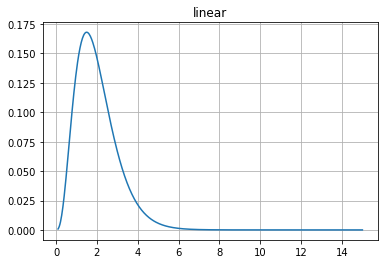

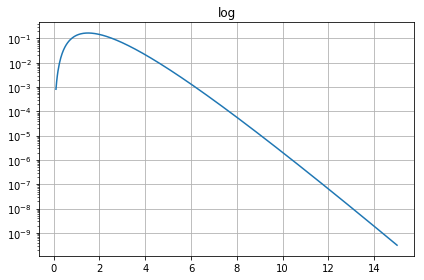

In [52]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3D projection
Import Axes3D, which registers the 3D projection, then need to create a 
subplot setting the projection to `'3d'`. This returns the Axes3DSubplot object that you can use to plot_surface giving x, y, z coordinates. 

In [53]:
from mpl_toolkits.mplot3d import Axes3D

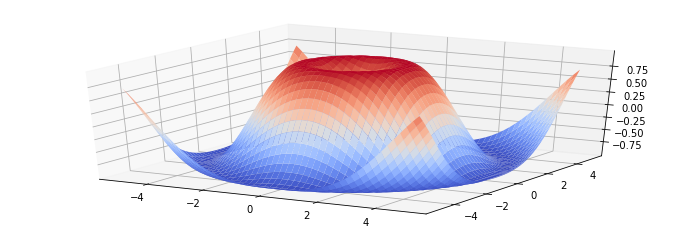

In [63]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X, Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12,4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

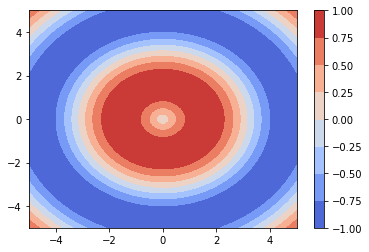

In [66]:
plt.contourf(X, Y, Z, cmap = matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

### Histograms

For historgrams you can provide the **data** (an array), 
the **number of bins** (all but the last bin is half-open. If bins is
`[1, 2, 3, 4]` then the first bin is `[1, 2)` (including 1, but excluding 2) and the second `[2, 3)`. The last bin, however, is `[3, 4]`, which includes 4), 
and **rwidth** (or relative width of the bars as a fraction of the bin width. If None, automatically compute the width).



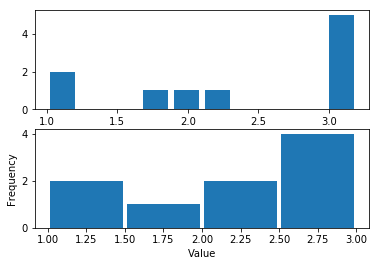

In [72]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth = 0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth = 0.95)
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

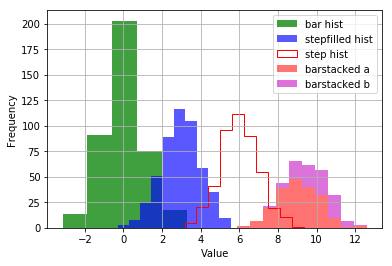

In [77]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins = 5, color='g', alpha=0.75, label='bar hist')
plt.hist(data2, color='b', alpha=0.65, histtype = 'stepfilled', label='stepfilled hist')
plt.hist(data3, color = 'r', histtype = 'step', label ='step hist')
plt.hist((data4a, data4b), color=('r', 'm'), alpha = 0.55, histtype = 'barstacked', 
         label = ('barstacked a', 'barstacked b'))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot
To draw a scatter plot provide the x and y coordinates of the points

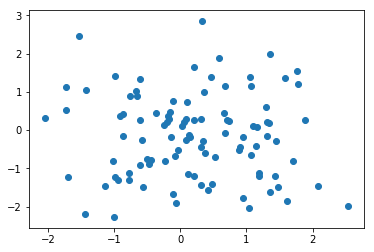

In [81]:
from numpy.random import rand
x, y = randn(2, 100)
plt.scatter(x,y)
plt.show()

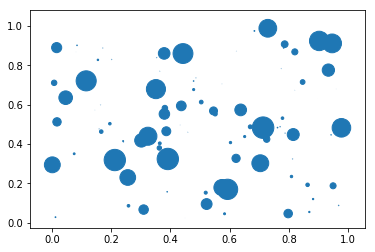

In [82]:
x, y, scale = rand(3,100)
scale = 500* scale ** 5
plt.scatter(x, y, s=scale)
plt.show()